In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Bid data mart.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


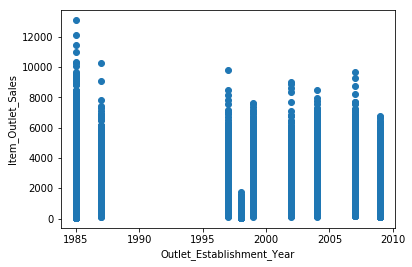

In [4]:
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
plt.scatter(df['Outlet_Establishment_Year'],df['Item_Outlet_Sales'])

# Here we can observe that Outlets established in 1985 has the highest item_outlet_sales.

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df['Outlet_Size']=imp.fit_transform(df[['Outlet_Size']])

In [7]:
imp=SimpleImputer(missing_values=np.NaN,strategy='mean')
df['Item_Weight']=imp.fit_transform(df[['Item_Weight']])

In [8]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Therefore we have successfully removed all the Null values.

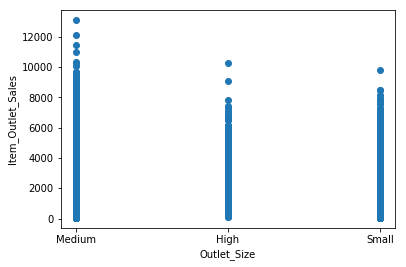

In [9]:
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.scatter(df['Outlet_Size'],df['Item_Outlet_Sales'])

<BarContainer object of 8523 artists>

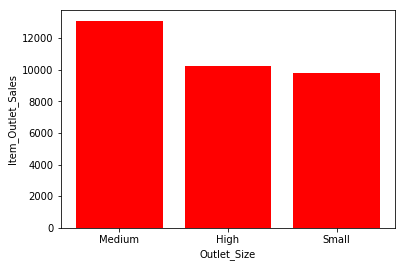

In [10]:
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.bar(df['Outlet_Size'],df['Item_Outlet_Sales'],color="red")

# We can say that Outlet_size "Medium" has the highest Item_outlet_sales.

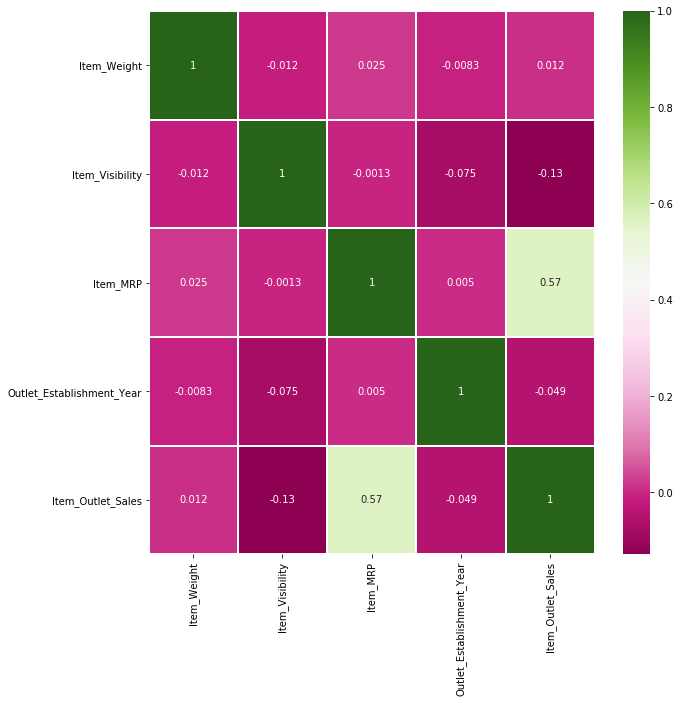

In [11]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(),annot=True,cmap="PiYG",lw=1)

# We can see that Item_outlet_sales is having -ve correlation with Item_visibility and Outlet_establishment year, but not very strong one.

<BarContainer object of 8523 artists>

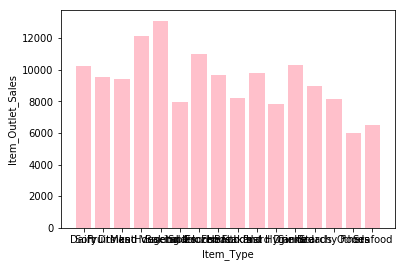

In [12]:
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.bar(df['Item_Type'],df['Item_Outlet_Sales'],color="pink")

<BarContainer object of 8523 artists>

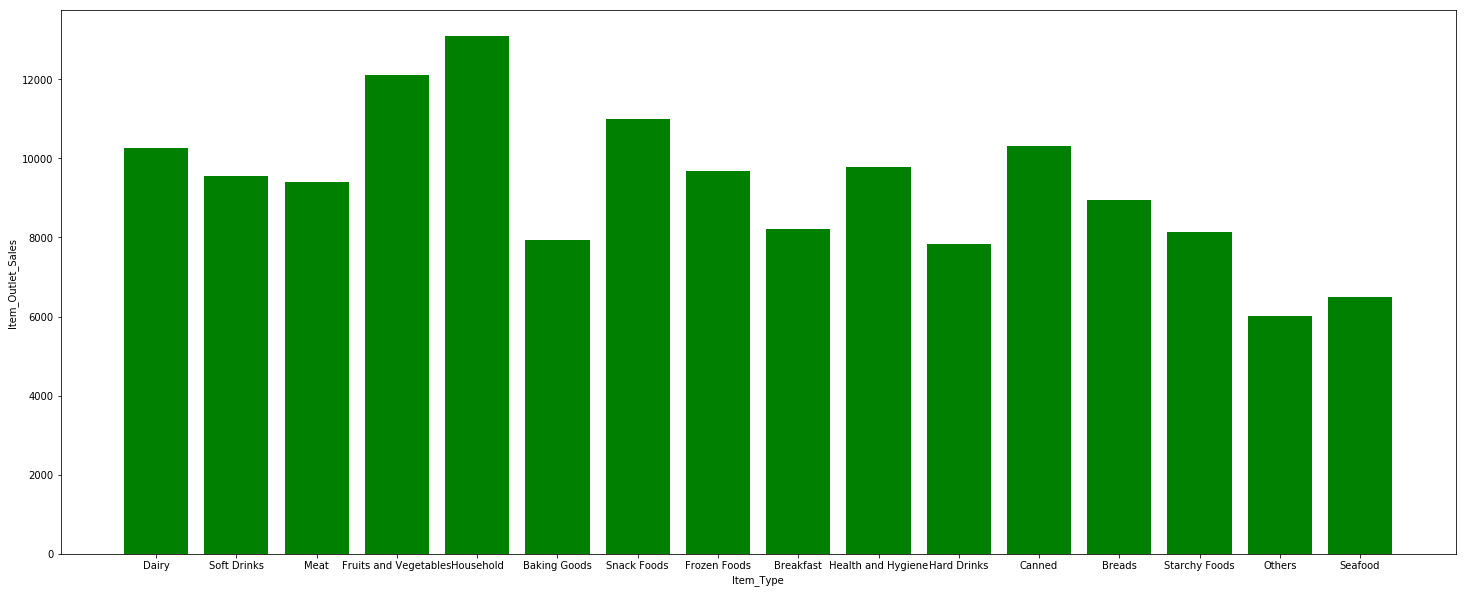

In [13]:
plt.figure(figsize = (25, 10)) 
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.bar(df['Item_Type'],df['Item_Outlet_Sales'],color="green")

# -->We can clearly Observe that Household and Fruits&Vegetables has the highest no. of sales.
-->Then according to sales, products like Dairy,Snack Food & Canned comes to 2nd Place.

# -->We can clearly Observe that Others and SeaFood has the lowest no. of sales.

<BarContainer object of 8523 artists>

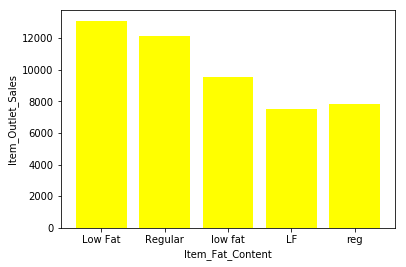

In [14]:
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.bar(df['Item_Fat_Content'],df['Item_Outlet_Sales'],color="Yellow")

# -->We can clearly Observe that Item_Fat_Content with "LOW FAT" and "REGULAR" has the highest no. of sales.

# -->We can clearly Observe that Item_Fat_Content with "LF" and "reg" has the lowest no. of sales.

<BarContainer object of 8523 artists>

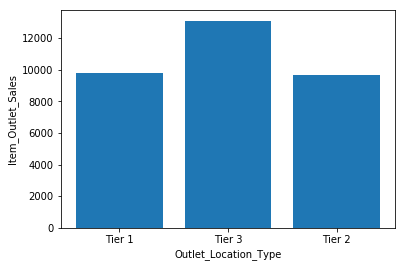

In [15]:
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item_Outlet_Sales')
plt.bar(df['Outlet_Location_Type'],df['Item_Outlet_Sales'])

# -->Here we can see that "TIER 3" (Outlet_Location_Type ) is having highest no. of sales.

In [16]:
df.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

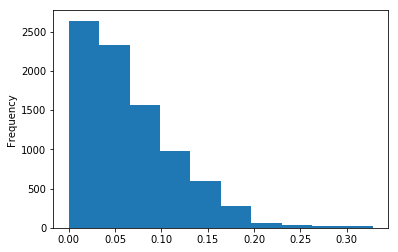

In [17]:
df['Item_Visibility'].plot.hist()

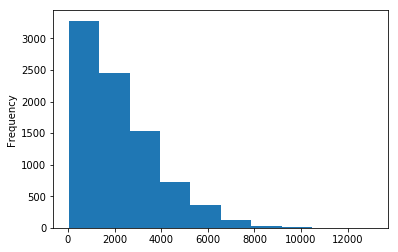

In [18]:
df['Item_Outlet_Sales'].plot.hist()

In [19]:

df.drop('Item_Identifier',axis=1,inplace=True)


In [20]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])

In [23]:
df['Item_Type']=le.fit_transform(df['Item_Type'])

In [24]:
df.drop('Outlet_Identifier',axis=1,inplace=True)

In [25]:
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])

In [26]:
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

In [27]:
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])

In [28]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1987,0,2,1,994.7052


# -->We have successfully converted categorical data into numeric for further processing.

In [29]:
from scipy.stats import zscore

In [30]:
df['Item_Visibility'].replace(0,df['Item_Visibility'].mean(axis=0),inplace=True)

In [31]:
df['Item_Outlet_Sales'].replace(0,df['Item_Outlet_Sales'].mean(axis=0),inplace=True)

In [32]:
from scipy.stats import boxcox
df['Item_Outlet_Sales'],lambd1=boxcox(df['Item_Outlet_Sales'])

In [33]:
df['Item_Visibility'],lambd2=boxcox(df['Item_Visibility'])

In [34]:
df.skew()

Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility             -0.029303
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales           -0.074978
dtype: float64

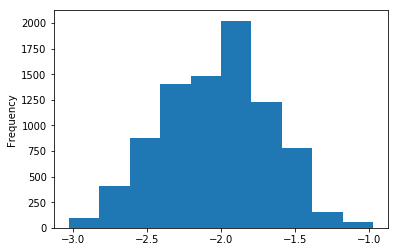

In [35]:
df['Item_Visibility'].plot.hist()

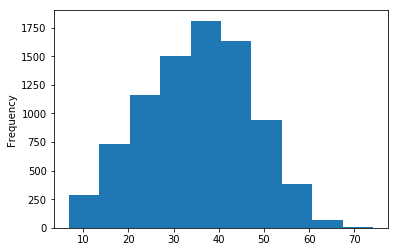

In [36]:
df['Item_Outlet_Sales'].plot.hist()

# Therefore we have removed Skewness from our data set which was in 2 columns i.e,Item_Visibility & Item_Outlet_Sales.

In [37]:
z=np.abs(zscore(df))
z

array([[0.84187169, 0.57284357, 1.50193663, ..., 1.36933384, 0.25265831,
        0.98497845],
       [1.64170589, 0.97809218, 1.31658685, ..., 1.09156913, 1.00297245,
        1.21783668],
       [1.09855449, 0.57284357, 1.45878641, ..., 1.36933384, 0.25265831,
        0.22028162],
       ...,
       [0.53424315, 0.57284357, 0.64561925, ..., 0.13888236, 0.25265831,
        0.39297347],
       [1.33644372, 0.97809218, 1.39581256, ..., 1.09156913, 1.00297245,
        0.07061745],
       [0.45963367, 0.57284357, 0.34443695, ..., 1.36933384, 0.25265831,
        0.79773148]])

In [38]:
threshold=3
print(np.where(z>3))

(array([  81,  151,  199,  339,  396,  489,  615,  727,  753,  838,  891,
       1010, 1034, 1090, 1124, 1133, 1183, 1209, 1372, 1433, 1512, 1542,
       1549, 1576, 1615, 1617, 1684, 1723, 1753, 1769, 2062, 2111, 2143,
       2168, 2173, 2223, 2331, 2438, 2552, 2569, 2660, 2678, 2905, 2971,
       2973, 3011, 3225, 3241, 3242, 3243, 3335, 3367, 3480, 3491, 3509,
       3545, 3582, 3602, 4019, 4083, 4163, 4245, 4290, 4393, 4415, 4463,
       4680, 4865, 5047, 5054, 5133, 5146, 5202, 5223, 5401, 5417, 5467,
       5539, 5577, 5611, 5633, 5784, 6132, 6176, 6268, 6344, 6357, 6370,
       6462, 6468, 6486, 6540, 6729, 6803, 6843, 7001, 7146, 7147, 7188,
       7200, 7308, 7318, 7353, 7496, 7535, 7693, 7703, 7712, 7722, 7745,
       7751, 7910, 7944, 8004, 8085, 8143, 8233, 8387, 8517], dtype=int64), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [39]:
df_new=df[(z<3).all(axis=1)]

In [40]:
print(df.shape)
print(df_new.shape)

(8523, 10)
(8404, 10)


# We have Removed outliers.i,e 119 rows have been removed as you can see.Now we will Divide our data into x&y for ML.

In [41]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [42]:
x.shape

(8523, 9)

In [43]:
y.shape

(8523,)

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5966, 9)
(5966,)
(2557, 9)
(2557,)


In [46]:
lm=LinearRegression()

In [47]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
lm.score(x_train,y_train)

0.5792370748192561

In [49]:
pred=lm.predict(x_test)

In [50]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

60.98748652932951
6.258579648856372
0.574125504507093


In [51]:
from sklearn.neighbors import KNeighborsRegressor

In [52]:
knn=KNeighborsRegressor()

In [53]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [54]:
knn.score(x_train,y_train)

0.6587017082248527

In [55]:
pred1=knn.predict(x_test)

In [56]:
print(mean_squared_error(y_test,pred1))
print(mean_absolute_error(y_test,pred1))
print(r2_score(y_test,pred1))

74.17155217343286
6.712357561735834
0.4820614168679396


In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rfc=RandomForestRegressor()

In [59]:
rfc.fit(x_train,y_train)

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [60]:
rfc.score(x_train,y_train)

0.9359190757090338

In [61]:
pred2=rfc.predict(x_test)

In [62]:
print(mean_squared_error(y_test,pred2))
print(mean_absolute_error(y_test,pred2))
print(r2_score(y_test,pred2))

52.66906362930676
5.6373586429603835
0.632212898453721


# -->Therefore we see that R2 score(63.17) of Random Forest Tree Regressor is most suited algorithm among above 3.